In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid", palette="Set2")

In [2]:
df = pd.read_csv("../data/raw/FMCG_2022_2024.csv")
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["year_month"] = df["date"].dt.strftime("%Y-%m")

print("Shape        : ", df.shape)
print("Date range   : ", df["date"].min().date(), "→", df["date"].max().date())
print("\nColumns: ")
print(df.dtypes)

Shape        :  (190757, 17)
Date range   :  2022-01-21 → 2024-12-31

Columns: 
date               datetime64[ns]
sku                        object
brand                      object
segment                    object
category                   object
channel                    object
region                     object
pack_type                  object
price_unit                float64
promotion_flag              int64
delivery_days               int64
stock_available             int64
delivered_qty               int64
units_sold                  int64
year                        int32
month                       int32
year_month                 object
dtype: object


In [3]:
df.head()

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold,year,month,year_month
0,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,Multipack,2.38,0,1,141,128,9,2022,1,2022-01
1,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,Single,1.55,1,3,0,129,0,2022,1,2022-01
2,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,Carton,4.00,0,5,118,161,8,2022,1,2022-01
3,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-Central,Single,5.16,0,2,81,114,7,2022,1,2022-01
4,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-North,Single,7.66,0,4,148,204,12,2022,1,2022-01


In [4]:
df.isnull().sum()

date               0
sku                0
brand              0
segment            0
category           0
channel            0
region             0
pack_type          0
price_unit         0
promotion_flag     0
delivery_days      0
stock_available    0
delivered_qty      0
units_sold         0
year               0
month              0
year_month         0
dtype: int64

In [5]:
for col in ["brand", "segment", "category", "channel", "region", "pack_type"]:
    print(f"{col:15s}: {df[col].unique()}")

brand          : ['MiBrand1' 'MiBrand4' 'YoBrand4' 'YoBrand2' 'YoBrand1' 'YoBrand3'
 'ReBrand1' 'ReBrand4' 'MiBrand3' 'JuBrand3' 'SnBrand2' 'ReBrand2'
 'SnBrand3' 'MiBrand2']
segment        : ['Milk-Seg3' 'Milk-Seg2' 'Yogurt-Seg2' 'Yogurt-Seg1' 'Yogurt-Seg3'
 'ReadyMeal-Seg2' 'ReadyMeal-Seg1' 'Juice-Seg3' 'SnackBar-Seg3'
 'ReadyMeal-Seg3' 'SnackBar-Seg2' 'SnackBar-Seg1' 'Milk-Seg1']
category       : ['Milk' 'Yogurt' 'ReadyMeal' 'Juice' 'SnackBar']
channel        : ['Retail' 'Discount' 'E-commerce']
region         : ['PL-Central' 'PL-North' 'PL-South']
pack_type      : ['Multipack' 'Single' 'Carton']


In [6]:
df[["price_unit", "stock_available", "delivered_qty", "units_sold"]].describe().round(2)

,price_unit,stock_available,delivered_qty,units_sold
count,190757.00,190757.00,190757.00,190757.00
mean,5.25,157.70,179.33,19.92
std,2.17,52.74,40.04,11.77
min,1.50,-12.00,-11.00,-25.00
25%,3.38,124.00,152.00,12.00
50%,5.25,155.00,179.00,18.00
75%,7.13,192.00,206.00,25.00
max,9.00,405.00,366.00,139.00


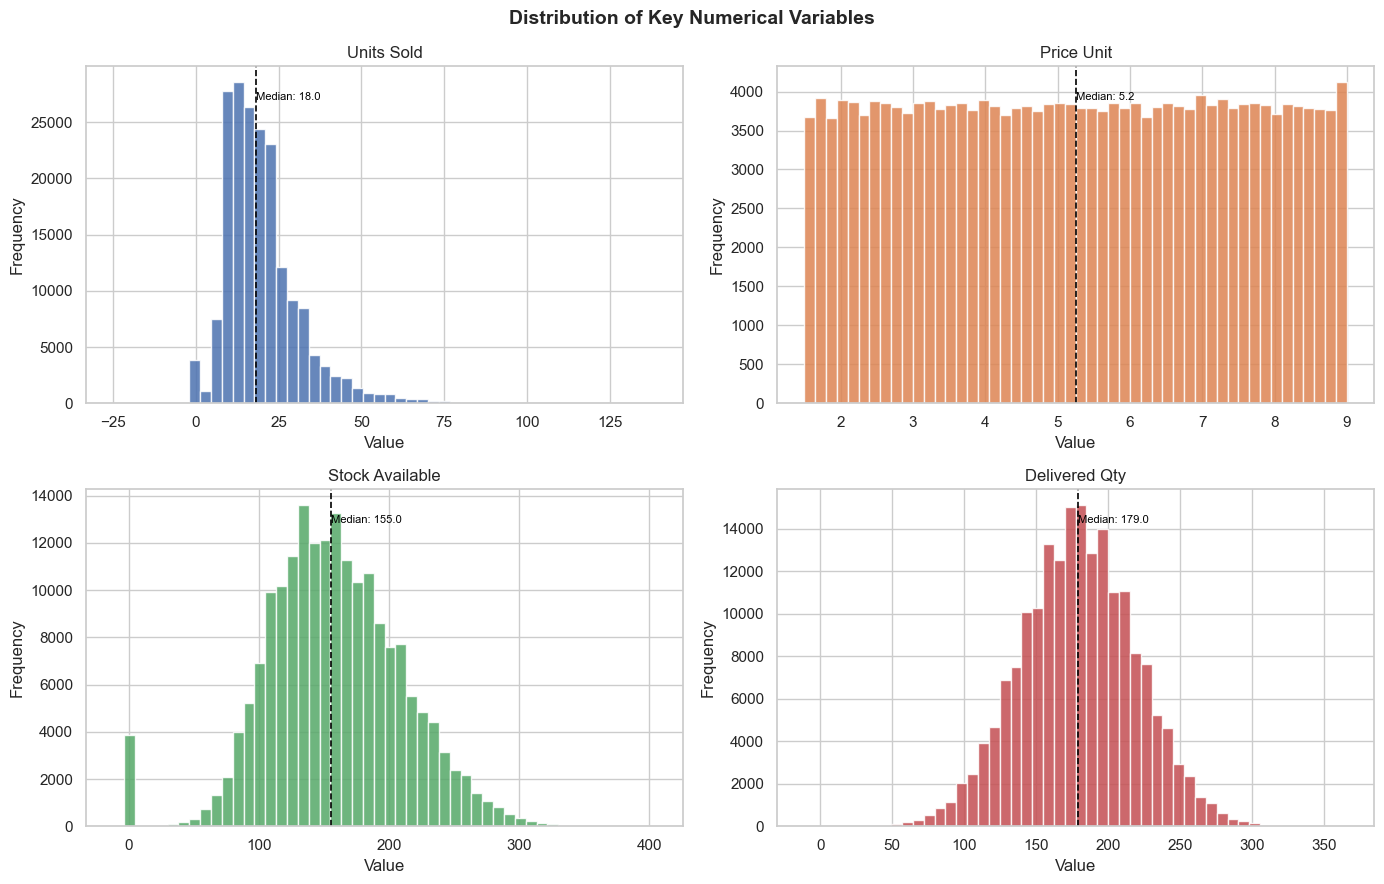

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(14, 9))
fig.suptitle("Distribution of Key Numerical Variables", fontsize=14, fontweight="bold")

for ax, col, color in zip(
    axes.flatten(),
    ["units_sold", "price_unit", "stock_available", "delivered_qty"],
    ["#4C72B0", "#DD8452", "#55A868", "#C44E52"]
):
    ax.hist(df[col], bins=50, color=color, edgecolor="white", alpha=0.85)
    ax.set_title(col.replace("_", " ").title())
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")
    median = df[col].median()
    ax.axvline(median, color="black", linestyle="--", linewidth=1.2)
    ax.annotate(f"Median: {median:.1f}", xy=(median, ax.get_ylim()[1]*0.9),
                fontsize=8, ha="left", color="black")

plt.tight_layout()
plt.savefig("../data/processed/eda_01_distributions.png", dpi=150, bbox_inches="tight")
plt.show()

Column                      Q1      Q3     IQR    Lower    Upper   Outliers
  units_sold              12.0    25.0    13.0     -7.5     44.5       7709
  price_unit               3.4     7.1     3.8     -2.2     12.8          0
  stock_available        124.0   192.0    68.0     22.0    294.0       4914
  delivered_qty          152.0   206.0    54.0     71.0    287.0       1289


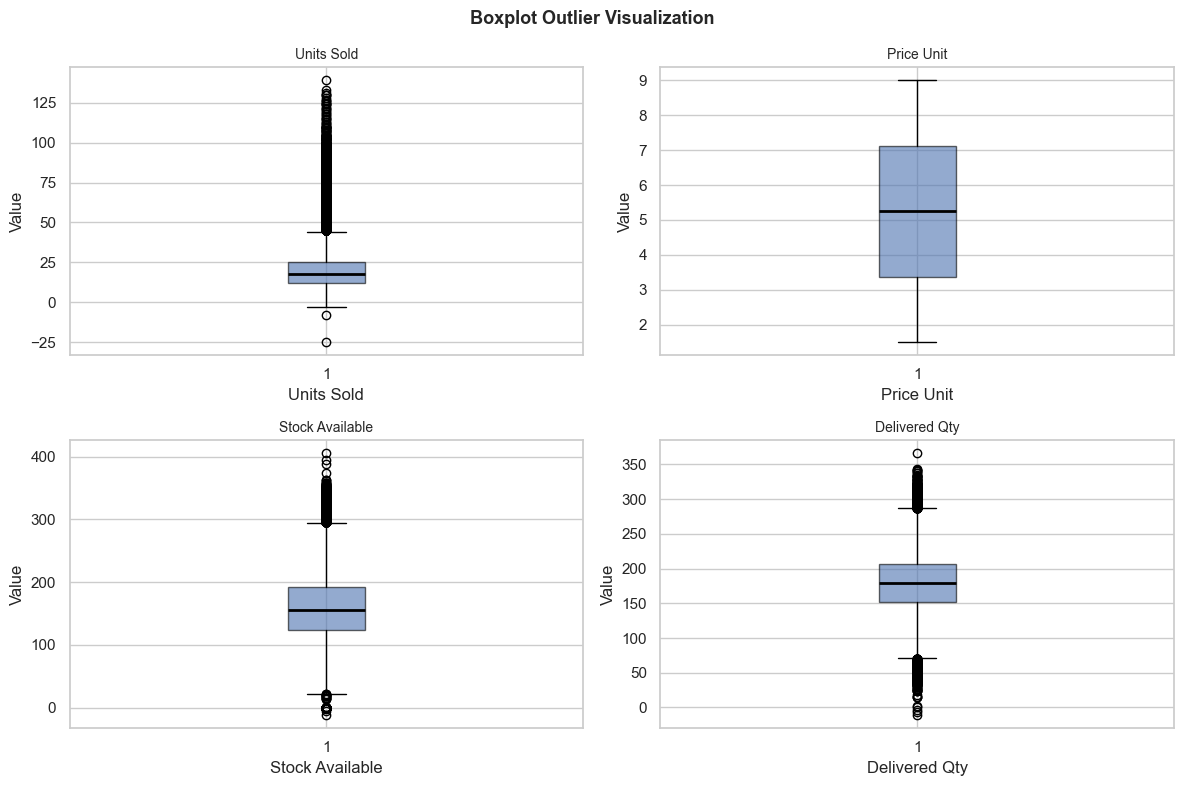

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Boxplot Outlier Visualization", fontsize=13, fontweight="bold")

print(f"{'Column':<22} {'Q1':>7} {'Q3':>7} {'IQR':>7} {'Lower':>8} {'Upper':>8} {'Outliers':>10}")

for col in ["units_sold", "price_unit", "stock_available", "delivered_qty"]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    n_out = ((df[col] < lower) | (df[col] > upper)).sum()
    print(f"  {col:<20} {Q1:>7.1f} {Q3:>7.1f} {IQR:>7.1f} {lower:>8.1f} {upper:>8.1f} {n_out:>10}")

for ax, col in zip(axes.flatten(), ["units_sold", "price_unit", "stock_available", "delivered_qty"]):
    ax.boxplot(df[col], patch_artist=True,
               boxprops=dict(facecolor="#4C72B0", alpha=0.6),
               medianprops=dict(color="black", linewidth=2))
    ax.set_title(col.replace("_", " ").title(), fontsize=10)
    ax.set_ylabel("Value")
    ax.set_xlabel(col.replace("_", " ").title())

plt.tight_layout()
plt.savefig("../data/processed/eda_02_boxplots.png", dpi=150, bbox_inches="tight")
plt.show()

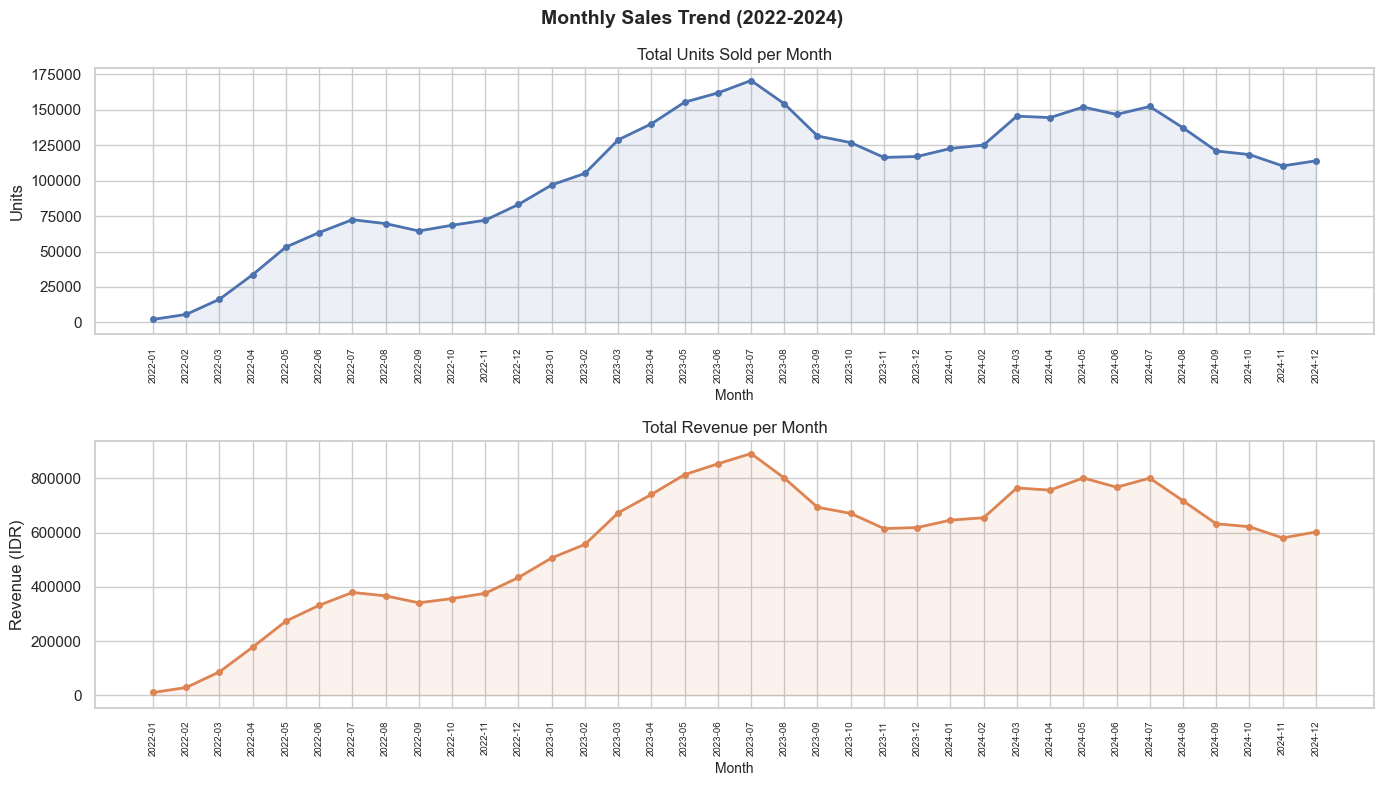

In [13]:
monthly = df.groupby("year_month").agg(
    total_units = ("units_sold", "sum"),
    total_rev = ("units_sold", lambda x: (x * df.loc[x.index, "price_unit"]).sum())
).reset_index()

fig, axes = plt.subplots(2, 1, figsize=(14, 8))
fig.suptitle("Monthly Sales Trend (2022-2024)", fontsize=14, fontweight="bold")

x = range(len(monthly))

axes[0].plot(monthly["year_month"], monthly["total_units"],
            marker="o", color="#4C72B0", linewidth=2, markersize=4)
axes[0].set_title("Total Units Sold per Month")
axes[0].set_ylabel("Units")
axes[0].tick_params(axis="x", rotation=90)
axes[0].fill_between(range(len(monthly)), monthly["total_units"], alpha=0.1, color="#4C72B0")

axes[1].plot(monthly["year_month"], monthly["total_rev"],
            marker="o", color="#DD8452", linewidth=2, markersize=4)
axes[1].set_title("Total Revenue per Month")
axes[1].set_ylabel("Revenue (IDR)")
axes[1].tick_params(axis="x", rotation=90)
axes[1].fill_between(range(len(monthly)), monthly["total_rev"], alpha=0.1, color="#DD8452")

for ax in axes:
    ax.set_xlabel("Month", fontsize=10)
    ax.set_xticks(range(len(monthly)))
    ax.set_xticklabels(monthly["year_month"], fontsize=7)

plt.tight_layout()
plt.savefig("../data/processed/eda_03_monthly_trend.png", dpi=150, bbox_inches="tight")
plt.show()

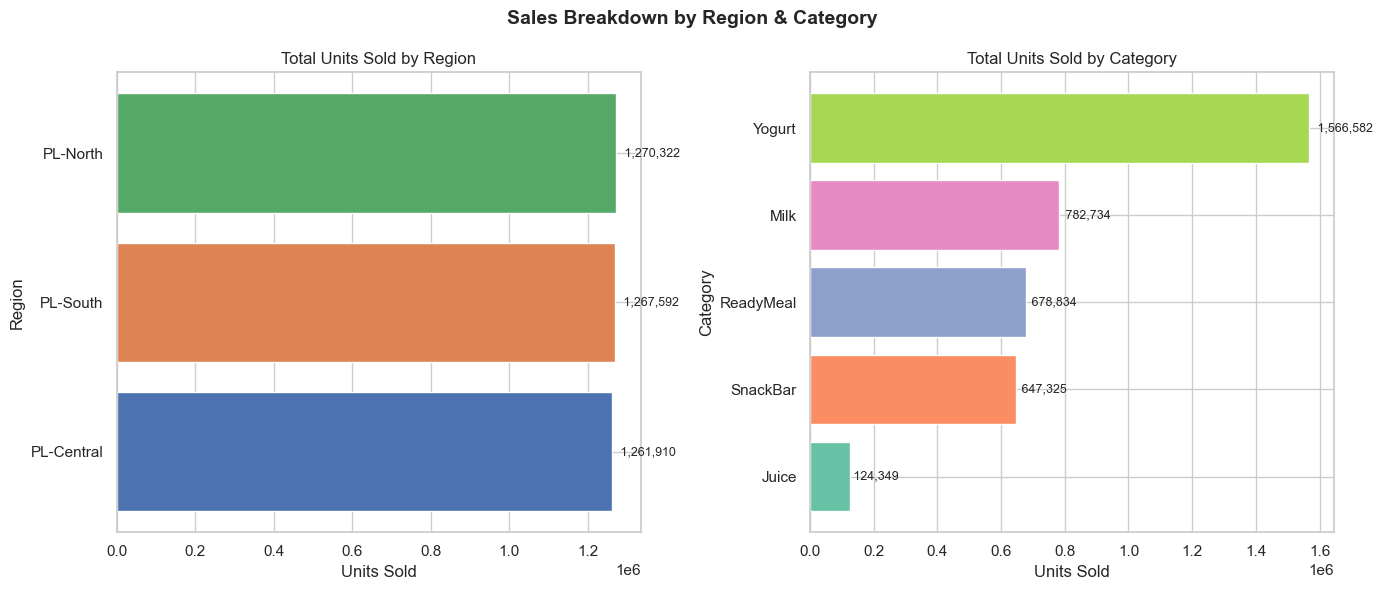

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
fig.suptitle("Sales Breakdown by Region & Category", fontsize=14, fontweight="bold")

region_sales = df.groupby("region")["units_sold"].sum().sort_values(ascending=True)
axes[0].barh(region_sales.index, region_sales.values, color=["#4C72B0", "#DD8452", "#55A868"])
axes[0].set_title("Total Units Sold by Region")
axes[0].set_xlabel("Units Sold")
axes[0].set_ylabel("Region")
for i, v in enumerate(region_sales.values):
    axes[0].text(v * 1.01, i, f"{v: ,.0f}", va="center", fontsize=9)

cat_sales = df.groupby("category")["units_sold"].sum().sort_values(ascending=True)
colors = sns.color_palette("Set2", len(cat_sales))
axes[1].barh(cat_sales.index, cat_sales.values, color=colors)
axes[1].set_title("Total Units Sold by Category")
axes[1].set_xlabel("Units Sold")
axes[1].set_ylabel("Category")
for i, v in enumerate(cat_sales.values):
    axes[1].text(v * 1.01, i, f"{v: ,.0f}", va="center", fontsize=9)

plt.tight_layout()
plt.savefig("../data/processed/eda_04_region_category.png", dpi=150, bbox_inches="tight")
plt.show()

Stockout Rate by Region (%)
region
PL-Central    2.00
PL-North      2.04
PL-South      2.03


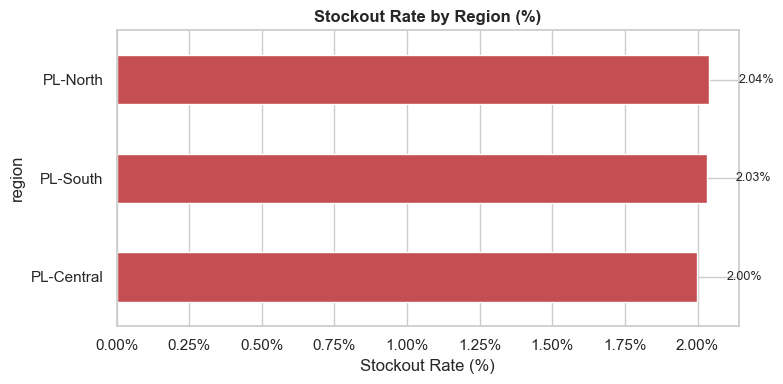

In [20]:
df["is_stockout"] = ((df["units_sold"] == 0) & (df["stock_available"] == 0)).astype(int)

stockout_rate = df.groupby("region")["is_stockout"].mean() * 100
print("Stockout Rate by Region (%)")
print(stockout_rate.round(2).to_string())

fig, ax = plt.subplots(figsize=(8, 4))
stockout_rate.sort_values().plot(kind="barh", ax=ax, color="#C44E52")
ax.set_title("Stockout Rate by Region (%)", fontweight="bold")
ax.set_xlabel("Stockout Rate (%)")
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
for i, v in enumerate(stockout_rate.sort_values().values):
    ax.text(v + 0.1, i, f"{v:.2f}%", va="center", fontsize=9)

plt.tight_layout()
plt.savefig("../data/processed/eda_05_stockout.png", dpi=150, bbox_inches="tight")
plt.show()

Promotion Impact on Units Sold
                 mean  median   count
No Promotion    17.44    16.0  162296
With Promotion  34.06    31.0   28461


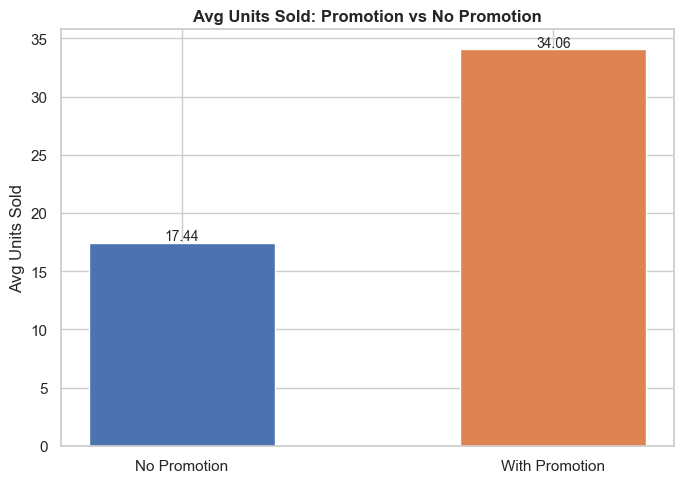

In [21]:
promo_impact = df.groupby("promotion_flag")["units_sold"].agg(["mean", "median", "count"])
promo_impact.index = ["No Promotion", "With Promotion"]
print("Promotion Impact on Units Sold")
print(promo_impact.round(2).to_string())

fig, ax = plt.subplots(figsize=(7, 5))
ax.bar(["No Promotion", "With Promotion"],
       promo_impact["mean"],
       color=["#4C72B0", "#DD8452"], width=0.5)
ax.set_title("Avg Units Sold: Promotion vs No Promotion", fontweight="bold")
ax.set_ylabel("Avg Units Sold")
for i, v in enumerate(promo_impact["mean"]):
    ax.text(i, v + 0.2, f"{v:.2f}", ha="center", fontsize=10)

plt.tight_layout()
plt.savefig("../data/processed/eda_06_promotion.png", dpi=150, bbox_inches="tight")
plt.show()

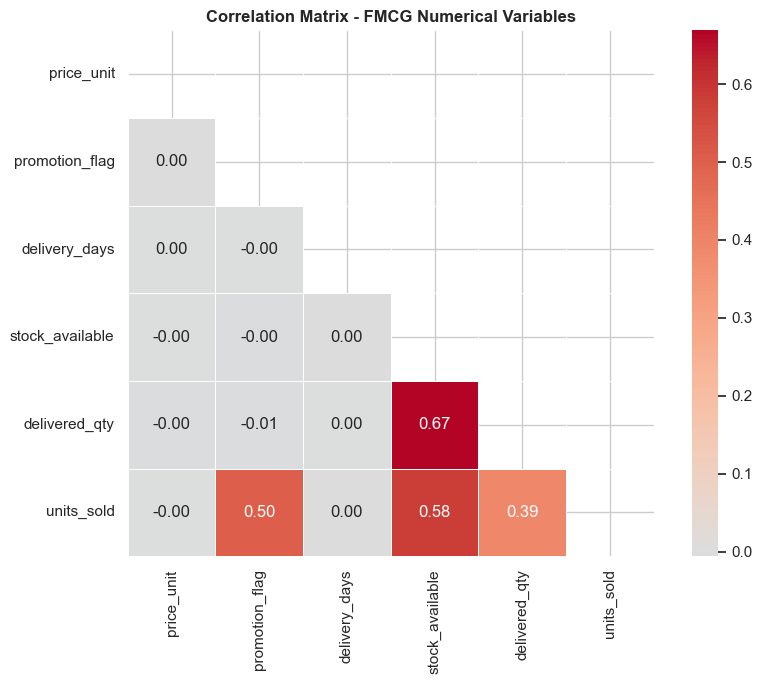

In [22]:
num_cols = ["price_unit", "promotion_flag", "delivery_days",
            "stock_available", "delivered_qty", "units_sold"]

corr = df[num_cols].corr()

fig, ax = plt.subplots(figsize=(9, 7))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="coolwarm",
            center=0, square=True, ax=ax, linewidths=0.5)
ax.set_title("Correlation Matrix - FMCG Numerical Variables", fontweight="bold")

plt.tight_layout()
plt.savefig("../data/processed/eda_07_correlation.png", dpi=150, bbox_inches="tight")
plt.show()